This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 [==============================] - 2s 4ms/step - loss: 0.2612 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1066 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0704 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0511 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0391 - accuracy: 0.9885


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 45ms/step


array([6.7518727e-08, 1.1519273e-09, 3.0162373e-06, 1.3679054e-04,
       2.2398687e-11, 1.9690687e-07, 1.0350432e-10, 9.9985850e-01,
       2.1256868e-07, 1.1233554e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9998585

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

  1/313 [..............................] - ETA: 37s - loss: 0.0080 - accuracy: 1.0000

313/313 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9793
test_acc: 0.9793000221252441


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

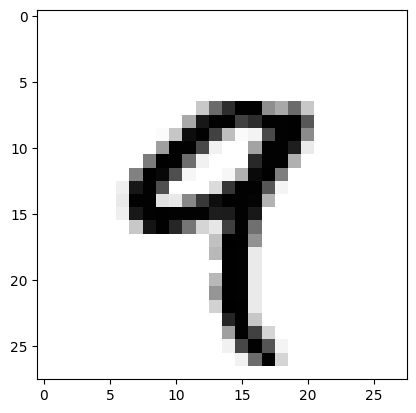

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

Vector Operation

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


non vector approach

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.34 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y.shape

(10,)

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
y.shape

(1, 10)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

single dimensional vectors (vectorized dot product)

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

single dim : non-vactorized naive dot product

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x is matrix (2 sim), y is vector (1 dim)

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # no. of columns in x must equal no. of rows in y
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

Using above function

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

now defining function for naive dot procuct of 2 matrices (both 2 dim)

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

1d tensor

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)

#defining context manager called tf.GradientTape() for automatic differentiation.
with tf.GradientTape() as tape: 
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

2d tensor

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

weights update mechanism (internally)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
 44/469 [=>............................] - ETA: 2s - loss: 0.6788 - accuracy: 0.8086

469/469 [==============================] - 2s 4ms/step - loss: 0.2652 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1063 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0387 - accuracy: 0.9881


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    """
    A simple dense (fully connected) layer class.
    
    This class represents a single dense layer in a neural network.
    It initializes the layer with random weights and zeros for the bias.
    
    Args:
        input_size (int): The size of the input to the layer.
        output_size (int): The size of the output from the layer.
        activation (callable): The activation function to be applied to the layer's output.

    Attributes:
        W (tf.Variable): The weight matrix for the layer.
        b (tf.Variable): The bias vector for the layer.
    """

    def __init__(self, input_size, output_size, activation):
        """
        Initialize the NaiveDense layer.
        """
        self.activation = activation

        # Initialize the weight matrix W with random values between 0 and 0.1
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        # Initialize the bias vector b with zeros
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        """
        Apply the layer to the input.

        Args:
            inputs (tf.Tensor): The input tensor to the layer.

        Returns:
            tf.Tensor: The output tensor after applying the layer's operations.
        """
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        """
        Get the layer's weights.

        Returns:
            list: A list containing the weight matrix W and the bias vector b.
        """
        return [self.W, self.b]


#### A simple Sequential class

In [ ]:
class NaiveSequential:
    """
    A simple implementation of a sequential neural network.

    Args:
        layers (list): A list of layer instances to be used sequentially in the network.

    Attributes:
        layers (list): A list of layer instances that make up the network.
    """

    def __init__(self, layers):
        """
        Initialize the NaiveSequential network.
        """
        self.layers = layers

    def __call__(self, inputs):
        """
        Perform a forward pass through the network.

        Args:
            inputs (tf.Tensor): The input tensor to the network.

        Returns:
            tf.Tensor: The output tensor after passing through all layers in the network.
        """
        x = inputs
        for layer in self.layers:
            x = layer(x)  # Apply each layer sequentially
        return x

    @property  # this decorator acts like a getter method and one can use model.weights to access weight as an attribute
    def weights(self):
        """
        Get the weights of all layers in the network.

        Returns:
            list: A list containing the weights (parameters) of all layers in the network.
        """
        weights = []
        for layer in self.layers:
            weights += layer.weights  # Collect weights from each layer
        return weights


In [ ]:
%%timeit
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

3.53 ms ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### A batch generator

In [ ]:
import math

class BatchGenerator:
    """
    A class for generating batches of data.

    Args:
        images (list): A list of input images.
        labels (list): A list of corresponding labels.
        batch_size (int, optional): The batch size for generating batches. Default is 128.

    Attributes:
        index (int): The current index for batch generation.
        images (list): The list of input images.
        labels (list): The list of corresponding labels.
        batch_size (int): The batch size for generating batches.
        num_batches (int): The total number of batches that can be generated.
    """

    def __init__(self, images, labels, batch_size=128):
        
        assert len(images) == len(labels)

        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size

        # Calculate the total number of batches
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        """
        Generate the next batch of data.

        Returns:
            tuple: A tuple containing two lists - images and labels for the next batch.
        """
        # Slice the images and labels for the current batch
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]

        # Increment the index for the next batch
        self.index += self.batch_size

        # Return the images and labels for the current batch
        return images, labels


### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    """
    Perform one training step for a machine learning model.

    Args:
        model (tf.keras.Model): The machine learning model.
        images_batch (tf.Tensor): A batch of input images.
        labels_batch (tf.Tensor): The corresponding batch of labels.

    Returns:
        float: The average loss for the batch.
    """
    # Create a context for computing gradients
    with tf.GradientTape() as tape:
        # Forward pass: Make predictions using the model
        predictions = model(images_batch)
        
        # Compute per-sample losses using sparse categorical cross-entropy
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch,
            predictions
            )
        
        # Calculate the average loss for the batch
        average_loss = tf.reduce_mean(per_sample_losses)
    
    # Compute gradients of the average loss with respect to model weights
    gradients = tape.gradient(average_loss, model.weights)
    
    # Update model weights using the computed gradients (implementation-specific)
    update_weights(gradients, model.weights)
    
    # Return the average loss for the batch
    return average_loss


In [ ]:
# Set the learning rate for weight updates
learning_rate = 1e-3

# Define a function to update model weights
def update_weights(gradients, weights):
    """
    Update model weights using gradients and the specified learning rate.

    Args:
        gradients (list of tf.Tensor): Gradients computed for each weight.
        weights (list of tf.Variable): Model's weight variables.

    """
    # Iterate over the gradients and weights
    for gradient, weight in zip(gradients, weights):
        # Update the weight using gradient descent
        weight.assign_sub(gradient * learning_rate)


In [ ]:
# Import the SGD optimizer from TensorFlow's Keras module
from tensorflow.keras import optimizers

# Create an instance of the SGD optimizer with a specified learning rate
optimizer = optimizers.SGD(learning_rate=1e-3)

# Define a function to update model weights using the optimizer
def update_weights(gradients, weights):
    """
    Update model weights using the specified optimizer.

    Args:
        gradients (list of tf.Tensor): Gradients computed for each weight.
        weights (list of tf.Variable): Model's weight variables.
    """
    # Zip gradients and weights together and apply the updates
    optimizer.apply_gradients(zip(gradients, weights))


### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    """
    Train a machine learning model using mini-batch stochastic gradient descent.

    Args:
        model (tf.keras.Model): The machine learning model to be trained.
        images (list): A list of input images.
        labels (list): A list of corresponding labels.
        epochs (int): The number of training epochs.
        batch_size (int, optional): The batch size for mini-batch SGD. Default is 128.
    """
    # Loop over the specified number of epochs
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        
        # Create a batch generator for the current epoch
        batch_generator = BatchGenerator(images, labels, batch_size)
        
        # Loop over mini-batches within the epoch
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            
            # Perform one training step for the model using the current batch
            loss = one_training_step(model, images_batch, labels_batch)
            
            # Print loss periodically (e.g., every 100 batches)
            if batch_counter % 100 == 0:
                print(f"Loss at batch {batch_counter}: {loss:.2f}")


In [ ]:
# Import the MNIST dataset from TensorFlow's Keras datasets module
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset and split it into training and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the training and test images
train_images = train_images.reshape((60000, 28 * 28))  # Reshape images to 1D vectors
train_images = train_images.astype("float32") / 255  # Normalize pixel values to [0, 1]
test_images = test_images.reshape((10000, 28 * 28))  # Reshape test images
test_images = test_images.astype("float32") / 255  # Normalize test images

# Call the `fit` function to train the model
fit(model, train_images, train_labels, epochs=10, batch_size=128)


Epoch 0
loss at batch 0: 5.37
loss at batch 100: 2.22
loss at batch 200: 2.17
loss at batch 300: 2.06
loss at batch 400: 2.19
Epoch 1
loss at batch 0: 1.87
loss at batch 100: 1.87
loss at batch 200: 1.80
loss at batch 300: 1.70
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.56
loss at batch 100: 1.57
loss at batch 200: 1.49
loss at batch 300: 1.42
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.21
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.11
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.05
loss at batch 400: 1.11
Epoch 5
loss at batch 0: 0.97
loss at batch 100: 1.02
loss at batch 200: 0.90
loss at batch 300: 0.93
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.72
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [ ]:
# Use the trained model to make predictions on the test images
predictions = model(test_images)

# Convert the predictions tensor to a NumPy array
predictions = predictions.numpy()

# Find the predicted labels by taking the argmax along axis 1
predicted_labels = np.argmax(predictions, axis=1)

# Compare the predicted labels with the true test labels to check for matches
matches = predicted_labels == test_labels

# Calculate and print the accuracy of the model's predictions
accuracy = matches.mean()
print(f"Accuracy: {accuracy:.2f}")


accuracy: 0.81


## Summary